# Proyecto Forbes 2021 - 2022 
## Manipulación y transformación de datos con Pandas y Numpy

## Autores
- Victor Manuel Arenas Lopez
- Marct Zullieth Isaza Yoja

In [11]:
import os
import numpy as np
import pandas as pd

In [12]:
os.chdir('C:/Users/Victor Manuel Arenas/Projects/IA/Inteligencia_artificial')
os.listdir()

['.git',
 '.gitignore',
 '.venv',
 '.vscode',
 '1. Introduccion.ipynb',
 '2. Numpy.ipynb',
 '3. PandasForbes.ipynb',
 'caracteristicas de vinos.csv',
 'Explicacion del modelo kmeans.ipynb',
 'Forbes 2000 2021.csv',
 'Forbes 2000 2022.csv',
 'forbes2023.csv',
 'Forbes_2023.pdf',
 'Mall_Customers.csv',
 'Pandas_Forbes2023.ipynb',
 'Project kmeans customer.ipynb']

In [13]:
forbes23 = pd.read_csv('forbes2023.csv',encoding= 'latin-1',sep=';')

In [14]:
# Cambiar el nombre de las columnas del DF
forbes23.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
forbes23.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [15]:
# Quitar las ',' de todo el DF usando una expresion regular
forbes23['Profits'] = forbes23['Profits'].replace(',', '', regex=True) 

In [16]:
# Coersionando los datos de str a float de la columna Profits
forbes23.loc[:,'Profits'] = forbes23.loc[:,'Profits'].astype(float)

In [17]:
# Validar si existe algun dato vacio en el DF
forbes23.isna().any()

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [18]:
# Accediendo a las filas de la 2 a la 4 mostrando las columnas Company, Country y Sales
forbes23[['Company','Country','Sales']][2:4]

,Company,Country,Sales
2,ICBC,China,216770
3,China Construction Bank,China,203080


In [19]:
# GroupBy Country
forbes23.groupby('Country').size()

Country
Argentina                 1
Australia                32
Austria                   9
Belgium                   6
Bermuda                   6
Brazil                   22
Canada                   57
Cayman Islands            2
Chile                     8
China                   302
Colombia                  4
Czech Republic            1
Denmark                  10
Egypt                     1
Finland                  10
France                   52
Germany                  53
Greece                    8
Hong Kong                44
Hungary                   2
India                    55
Indonesia                 8
Ireland                  22
Israel                   11
Italy                    28
Japan                   192
Jordan                    1
Kazakhstan                2
Kuwait                    2
Luxembourg                6
Malaysia                  8
Mexico                   13
Morocco                   2
Netherlands              25
Nigeria                   2
Norway      

## Analisis Exploratorio

In [20]:
# Primeras 5 empresas del ranking forbes 2020 2023
forbes23.head(5)['Company']

0                              JPMorgan Chase
1    Saudi Arabian Oil Company (Saudi Aramco)
2                                        ICBC
3                     China Construction Bank
4                  Agricultural Bank of China
Name: Company, dtype: object

In [21]:
# Valorar el 1% de las empresas con mas ganancias en el mundo
p99p = np.percentile(forbes23['Profits'],99)
print(p99p)

24840.59999999999


In [22]:
# Filtrar las compañias con ganancias mayores a p99p
forbes23[forbes23['Profits'] > p99p][['Company','Country','Profits']]


,Company,Country,Profits
0,JPMorgan Chase,United States,41800.0
1,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,156360.0
2,ICBC,China,52470.0
3,China Construction Bank,China,48250.0
4,Agricultural Bank of China,China,37920.0
5,Bank of America,United States,28620.0
6,Alphabet,United States,58590.0
7,ExxonMobil,United States,61690.0
8,Microsoft,United States,69020.0
9,Apple,United States,94320.0


In [23]:
# Filtrar las empresas Colombianas que tuvieron ganancias mayoes $1.000
forbes23[(forbes23['Country']== 'Colombia') & (forbes23['Profits']> 1000)]


,Rank,Company,Country,Sales,Profits,Assets,Market_value
310,311,Ecopetrol,Colombia,33670,7850.0,62450,18760
896,897,Bancolombia,Colombia,7850,1590.0,72760,7380
1404,1405,Grupo Aval,Colombia,6580,5828.0,60960,2920
1977,1977,Grupo Bolivar,Colombia,5880,2492.0,41940,1110


In [24]:
import matplotlib.pyplot as plt

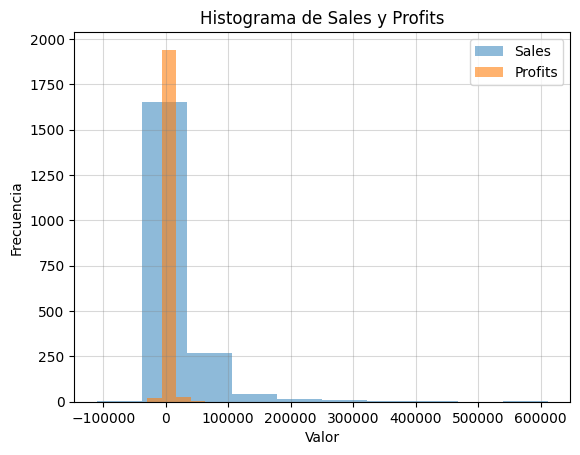

In [25]:
# Comparacion de las ventas vs ganancias de las compañias
# Crear un histograma para las ventas de todas las compañias
plt.hist(forbes23['Sales'], alpha=0.5, label='Sales')
# Crear un histograma para las ganancias de todas las compañias
plt.hist(forbes23['Profits'], alpha=0.6, label='Profits')
# Configurar las propiedades de leyenda del gráfico
plt.legend()
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Sales y Profits')
plt.grid(color='gray', linestyle='solid', alpha = 0.3)
plt.show()

In [26]:
# Paises definidos para Sudamerica
suda = ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Paraguay','Peru','Uruguay','Venezuela']
# Crear un DF solamente con las compañias que pertenezcan a  los paises definidos para Sudamerica
f_suda = forbes23[forbes23['Country'].isin(suda)]
f_suda.sample(20)

,Rank,Company,Country,Sales,Profits,Assets,Market_value
979,980,Gerdau (Cosigua),Brazil,15700,2270.0,14940,8730
749,750,YPF,Argentina,18630,2210.0,25910,9050
170,171,Banco do Brasil,Brazil,53980,5760.0,380270,24850
1429,1430,Latam Airlines,Chile,9430,1480.0,13210,4520
97,98,Ita Unibanco Holding,Brazil,53170,5750.0,441400,51280
1404,1405,Grupo Aval,Colombia,6580,5828.0,60960,2920
1222,1223,WEG,Brazil,5970,8865.0,5700,33130
172,173,Banco Bradesco,Brazil,56260,3490.0,357450,31600
953,954,MercadoLibre,Uruguay,11330,618.0,14200,62440
1678,1679,Ultrapar Participacoes,Brazil,27670,3124.0,6690,3610


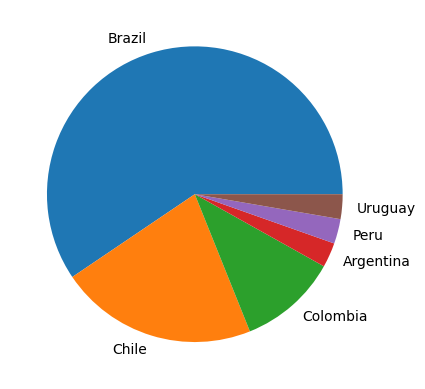

In [27]:
# Crear el DF para guardar las frecuencias e indices del DF de compañias sudamenricanas
table_suda=f_suda['Country'].value_counts()

# Grafico pie de las compañias sudamericanas
plt.pie(table_suda.values,labels=table_suda.index)
plt.show() #Imprime el gráfico


## Médtodo del Codo

In [28]:
from sklearn.cluster import KMeans

In [42]:
WCSS = []
df = forbes23
df = df.drop('Company', axis=1)
df = df.drop('Country', axis=1)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    WCSS.append(kmeans.inertia_)

c:\Users\Victor Manuel Arenas\Projects\IA\Inteligencia_artificial\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Victor Manuel Arenas\Projects\IA\Inteligencia_artificial\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Victor Manuel Arenas\Projects\IA\Inteligencia_artificial\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Victor Manuel Arenas\Proj

In [43]:
print(WCSS)

[307496112463427.4, 118832653578537.5, 71599742449035.62, 52340767378682.766, 36676539845030.25, 26520847965614.496, 21009092967355.586, 17986648508056.617, 15387758259105.371, 13949243519415.186]


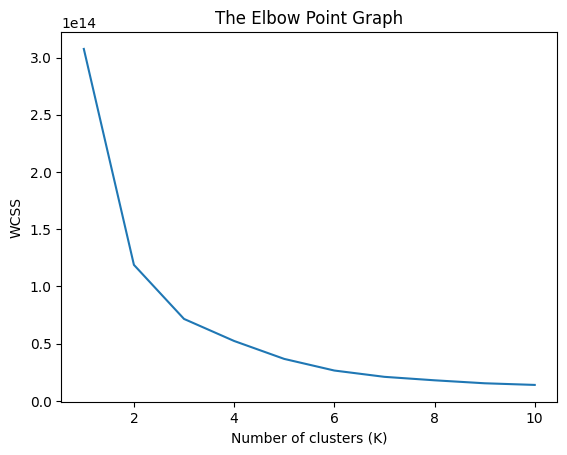

In [44]:
plt.plot(range(1,11),WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Numero de Clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans_model = KMeans(n_clusters=5, init='k-means++',random_state=0)

In [49]:
y = kmeans_model.fit_predict(df)

[1 3 1 ... 0 0 0]


c:\Users\Victor Manuel Arenas\Projects\IA\Inteligencia_artificial\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [50]:
kmeans_model.cluster_centers_

array([[1.05583047e+03, 2.06435676e+04, 3.38956491e+03, 4.98850456e+04,
        2.94223498e+04],
       [6.25000000e+01, 1.78286667e+05, 3.76600000e+04, 4.82244667e+06,
        1.73431833e+05],
       [8.95000000e+01, 7.77491667e+04, 1.08204167e+04, 2.04796667e+06,
        7.99402917e+04],
       [1.28000000e+01, 3.97982000e+05, 7.65160000e+04, 4.41422000e+05,
        1.90717200e+06],
       [2.96673267e+02, 7.36604158e+04, 4.75137624e+03, 5.78356238e+05,
        6.58709010e+04]])

In [53]:
df.columns

Index(['Rank', 'Sales', 'Profits', 'Assets', 'Market_value'], dtype='object')

C:\Users\Victor Manuel Arenas\AppData\Local\Temp\ipykernel_16152\2544807254.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Rank', y='Assets', data=df, palette = "viridis")


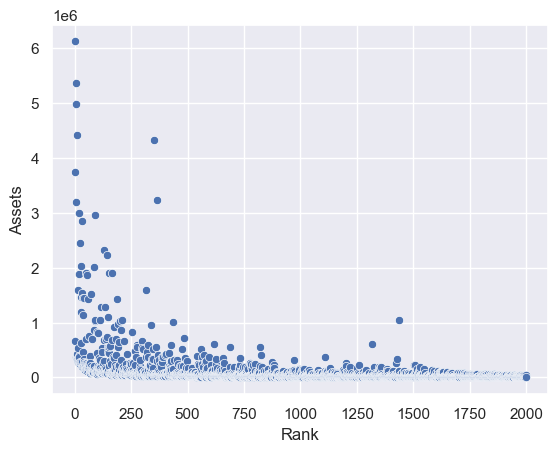

In [88]:
import seaborn as sns; sns.set()
sns.scatterplot(x='Rank', y='Assets', data=df, palette = "viridis")
plt.show()

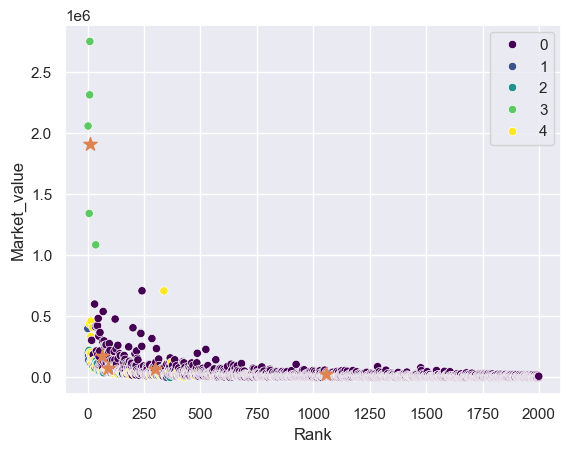

In [94]:
# Kmeans
sns.scatterplot(x='Rank', y='Market_value', hue= y, data=df, palette = "viridis")
plt.scatter(kmeans_model.cluster_centers_[:,0],kmeans_model.cluster_centers_[:,4],marker='*',s=100)
plt.show()

## Interpretación de la Clasificación